In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv('Crop Production data (1).csv')

In [5]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [7]:
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [21]:
df.select_dtypes(include='object').columns

Index(['State_Name', 'District_Name', 'Season', 'Crop'], dtype='object')

In [ ]:
[f"{i} :{len(df[i].unique())}" for i in df.select_dtypes(include='object').columns]

['State_Name :33', 'District_Name :646', 'Season :6', 'Crop :124']

## Nan behavior check

In [40]:
df[df.Production.isna()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00,NaN
244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00,NaN
245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00,NaN
245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00,NaN


In [39]:
df[df.Production.isna()]['State_Name'].value_counts()

State_Name
Haryana                        1335
Rajasthan                       448
Chhattisgarh                    341
Madhya Pradesh                  339
Tamil Nadu                      281
Kerala                          258
Maharashtra                     132
Uttar Pradesh                   117
Uttarakhand                      71
Gujarat                          71
Andhra Pradesh                   67
Telangana                        58
Odisha                           51
Karnataka                        43
Himachal Pradesh                 38
Punjab                           30
West Bengal                      16
Bihar                            11
Assam                             6
Puducherry                        4
Mizoram                           3
Nagaland                          2
Jammu and Kashmir                 2
Andaman and Nicobar Islands       2
Manipur                           1
Goa                               1
Chandigarh                        1
Arunachal Pradesh

<Axes: xlabel='State_Name'>

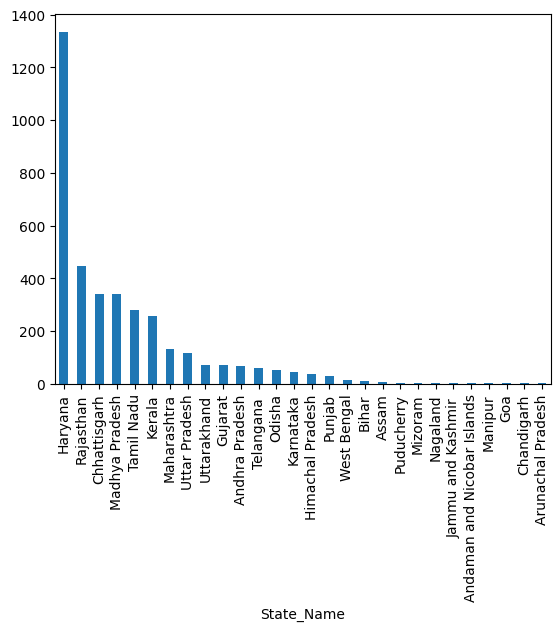

In [54]:
df[df.Production.isna()]['State_Name'].value_counts().plot(kind='bar')

<Axes: ylabel='Density'>

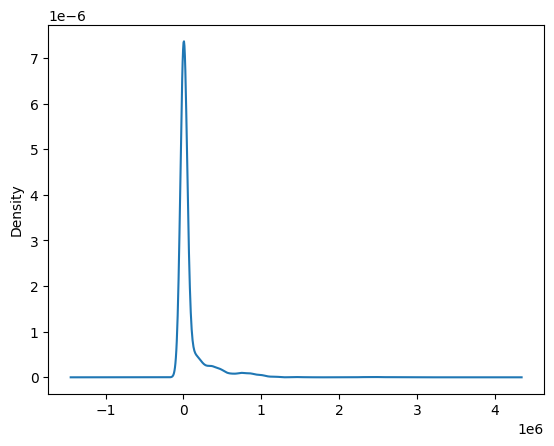

In [56]:
df[df['State_Name']=='Haryana']['Production'].plot(kind='kde')

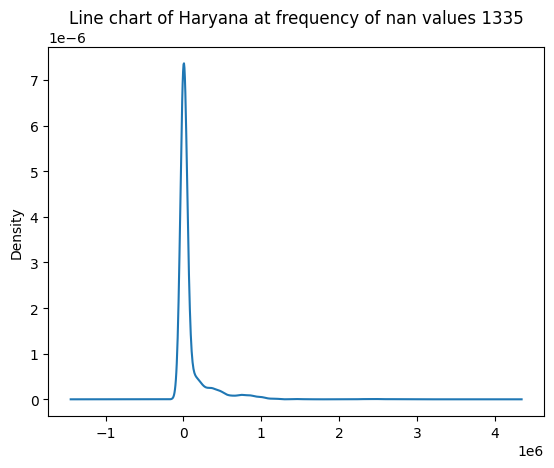

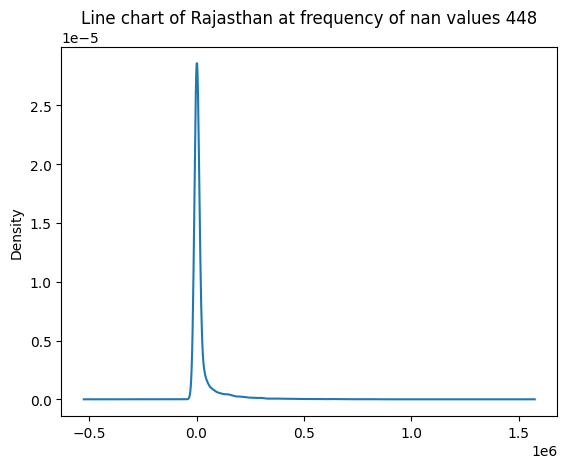

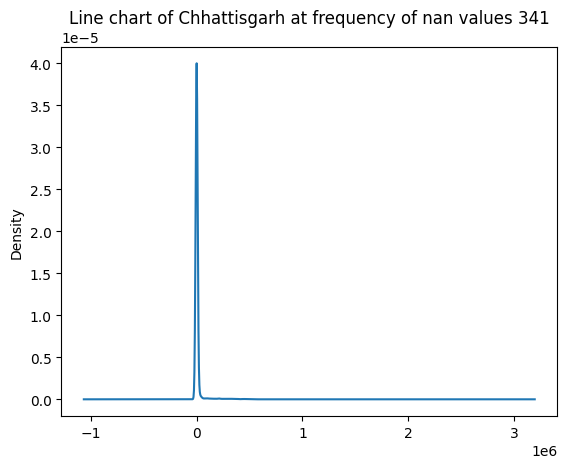

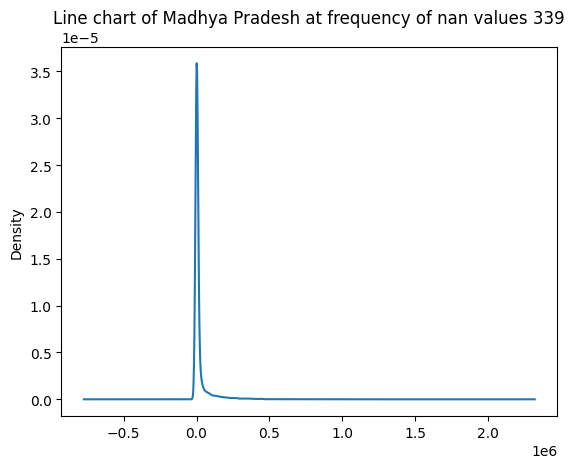

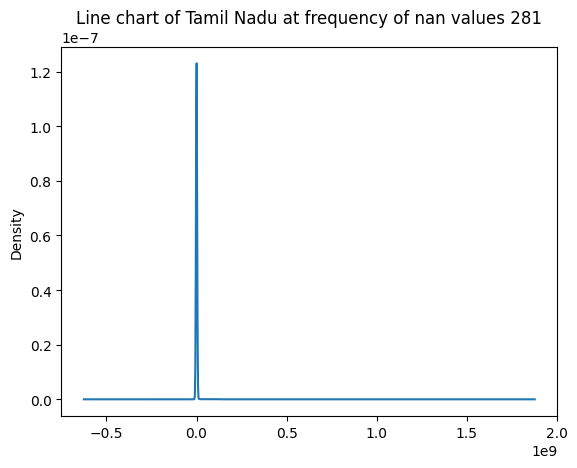

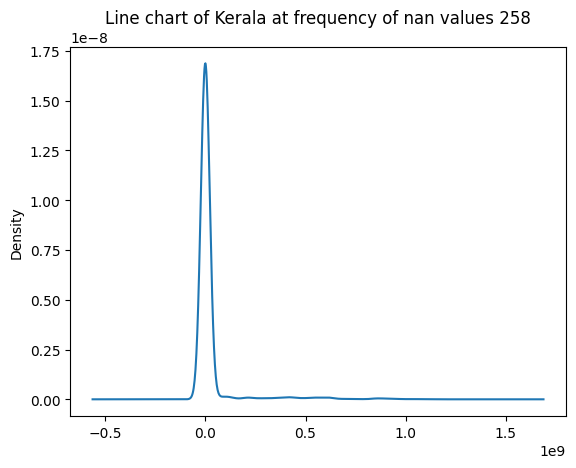

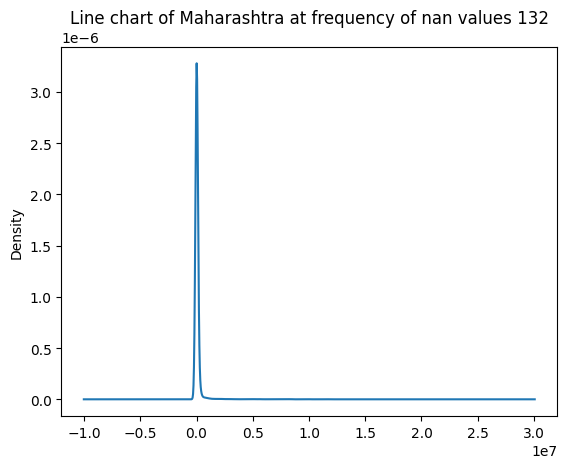

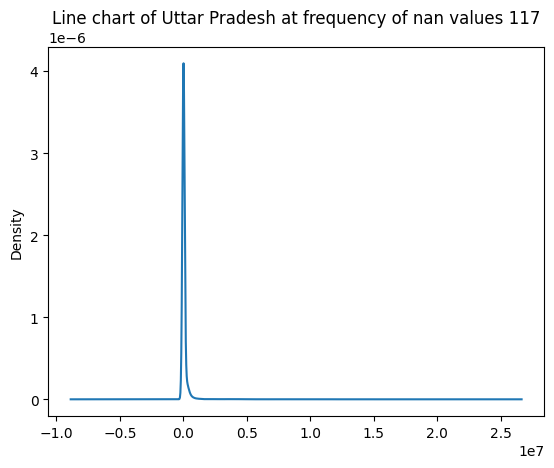

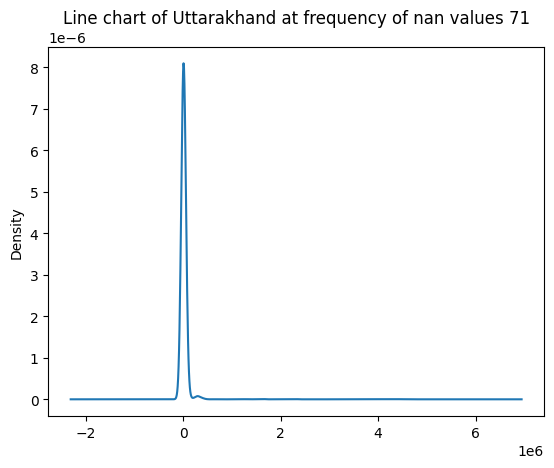

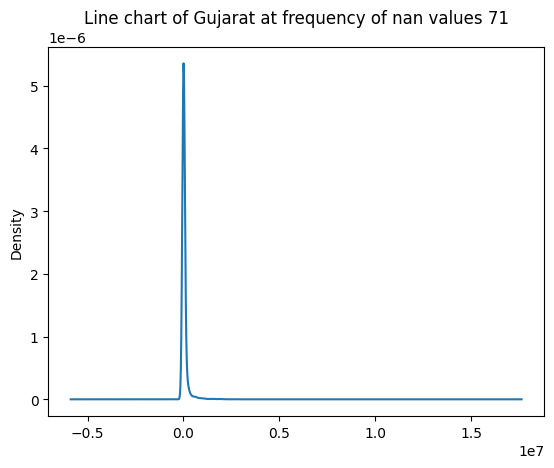

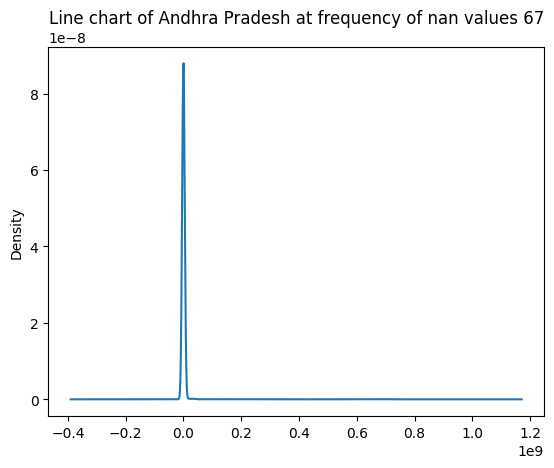

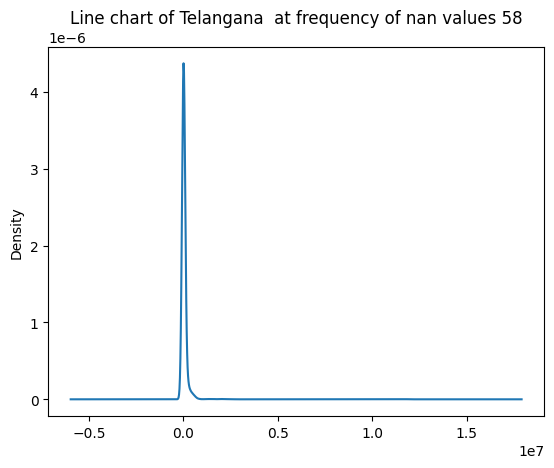

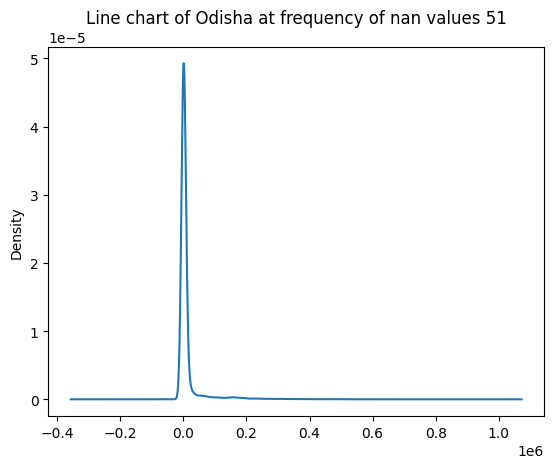

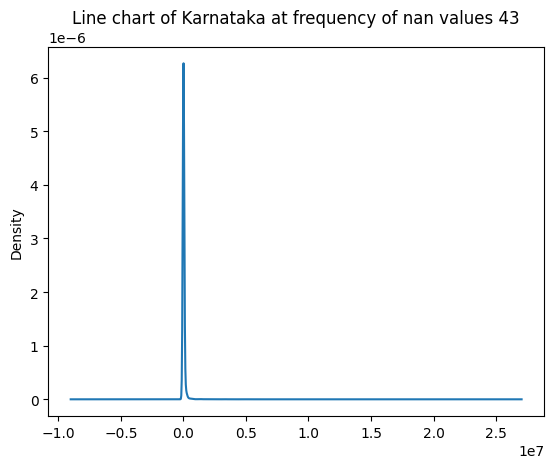

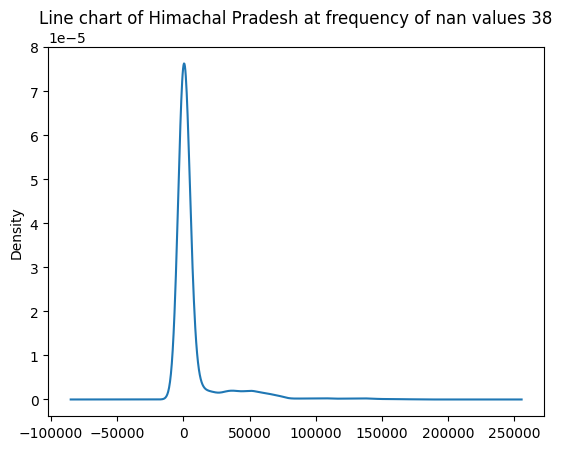

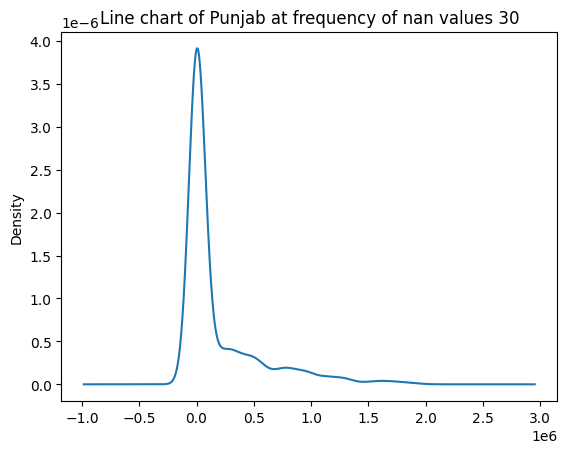

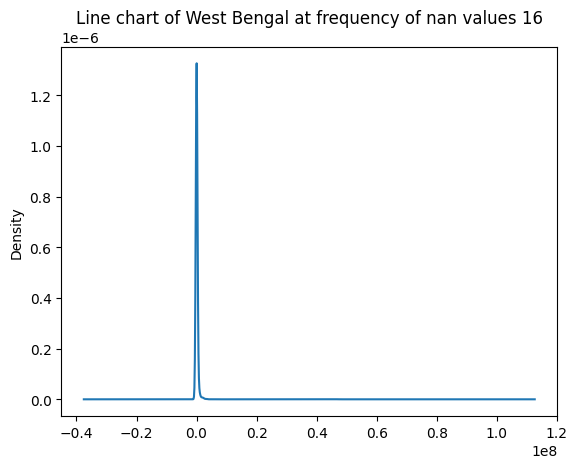

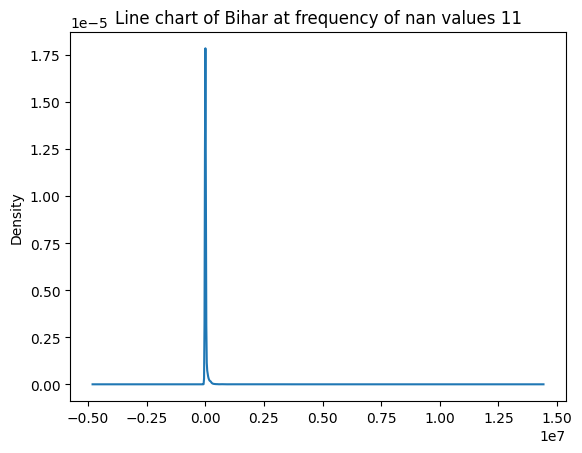

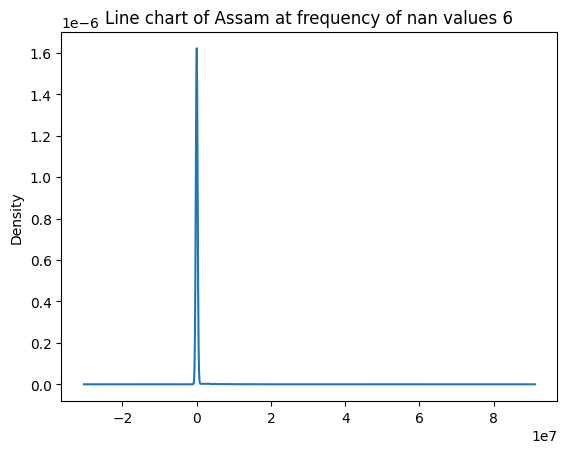

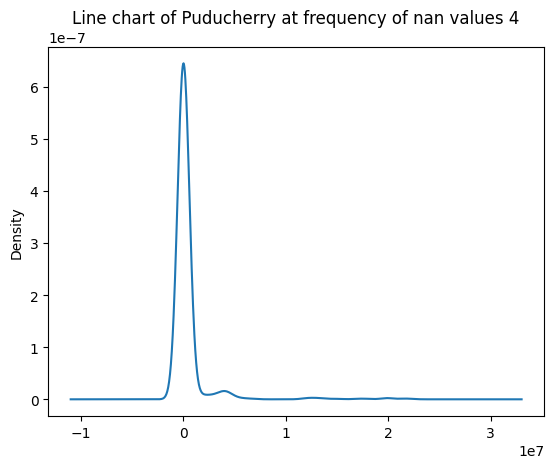

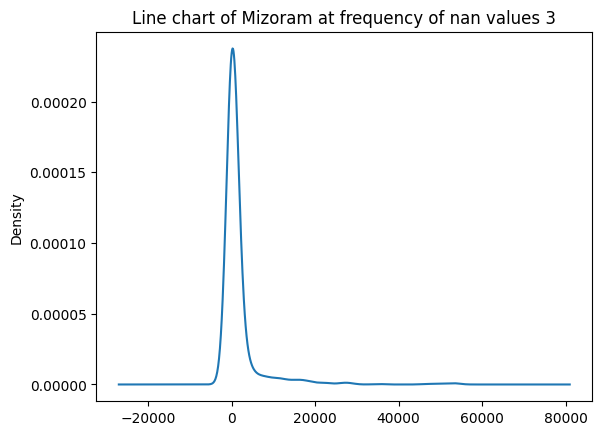

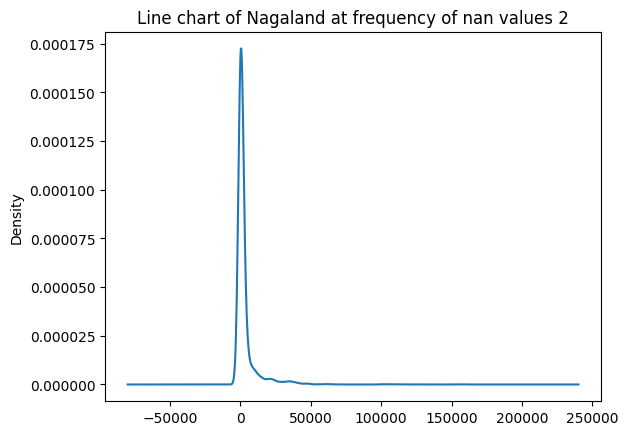

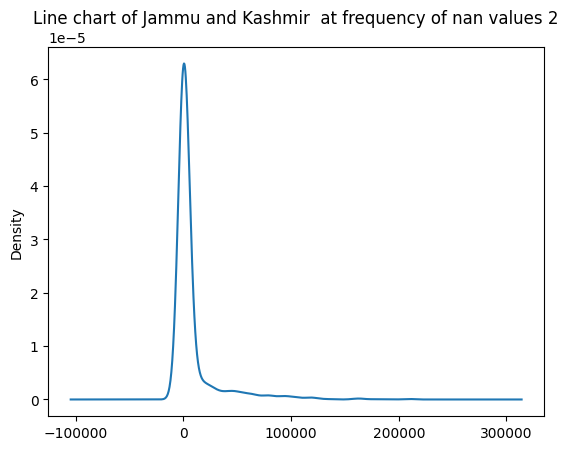

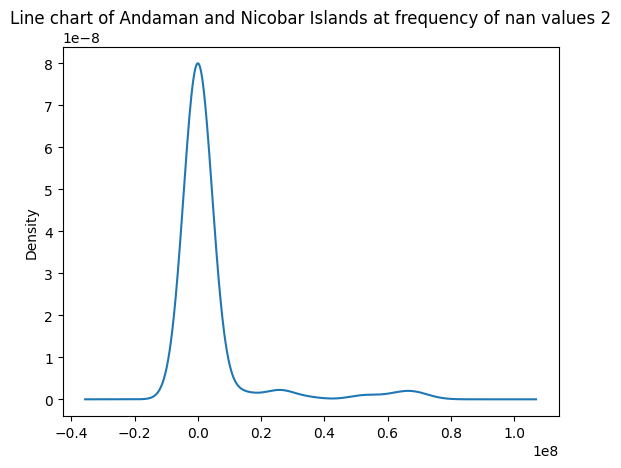

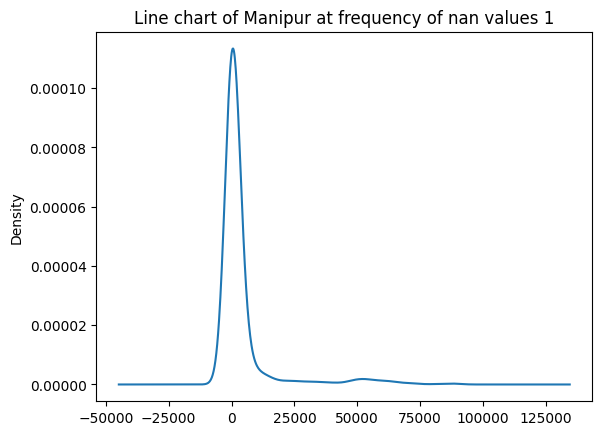

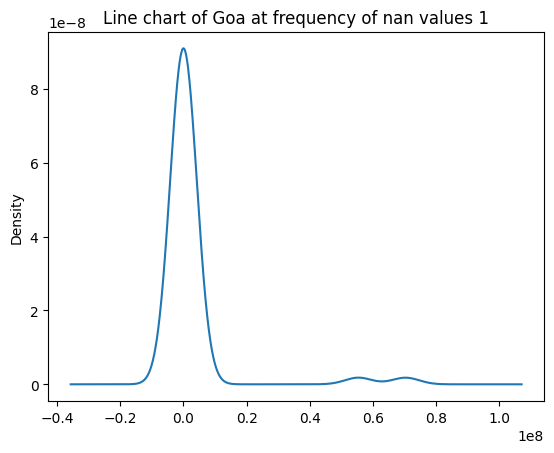

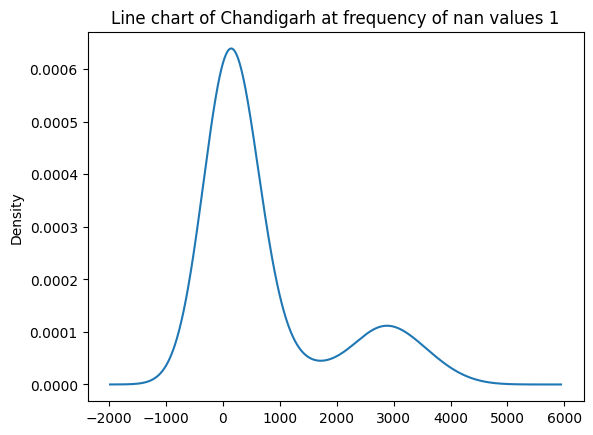

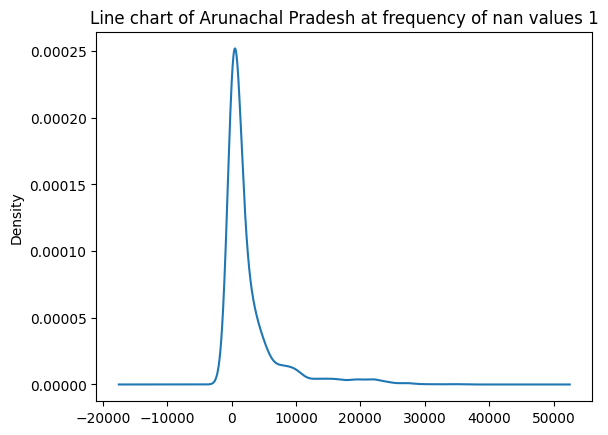

In [67]:
for i in df[df.Production.isna()]['State_Name'].value_counts().index:
    
    ax=df[df['State_Name']==i]['Production'].plot(kind='kde')
    plt.title(f"Line chart of {i} at frequency of nan values {df[df.Production.isna()]['State_Name'].value_counts()[i]}")
    plt.show()

In [45]:
df[df['State_Name']=='Haryana']['Production'].mean()

83981.03303964758

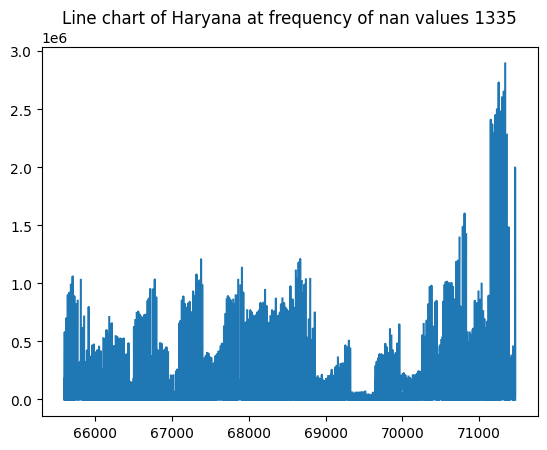

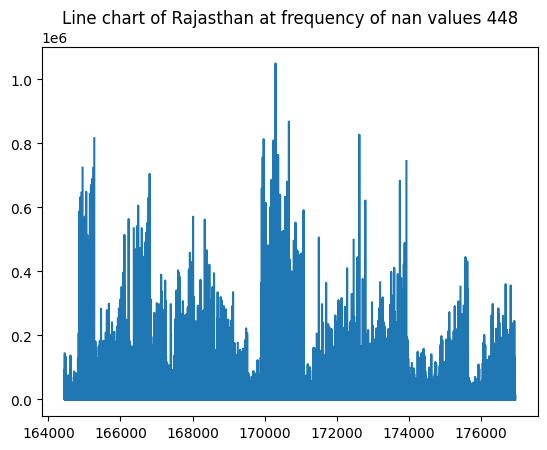

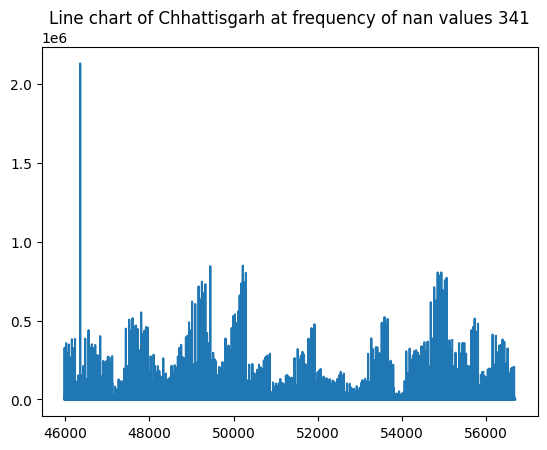

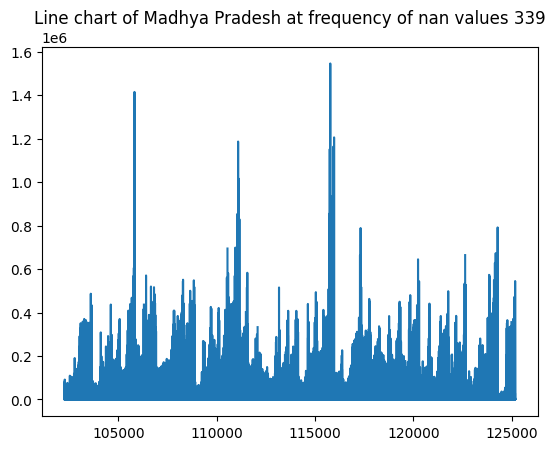

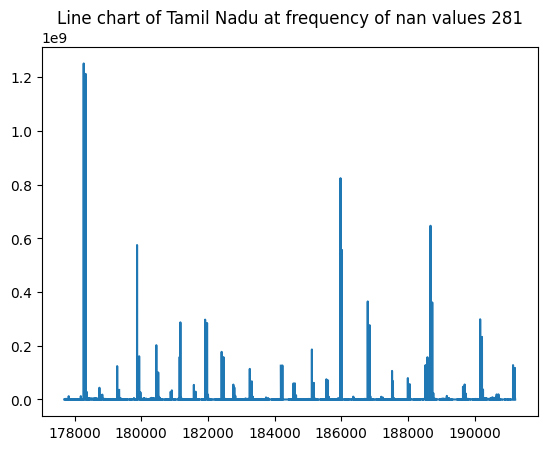

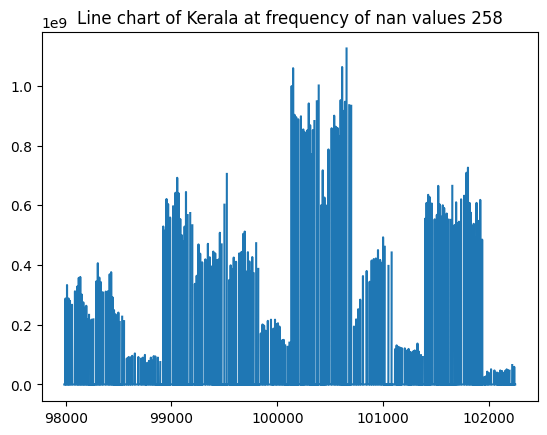

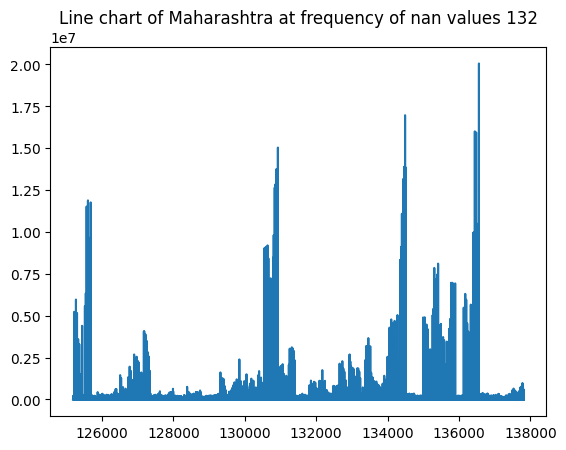

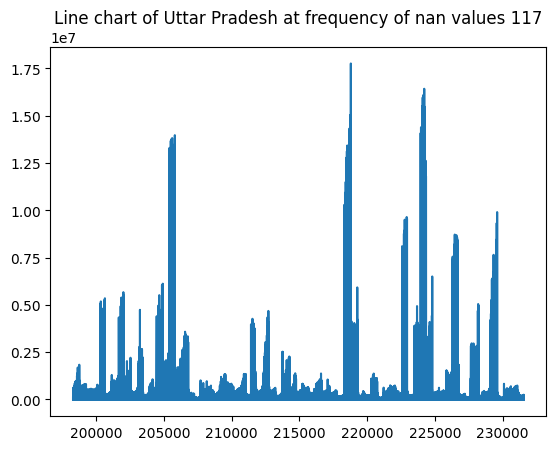

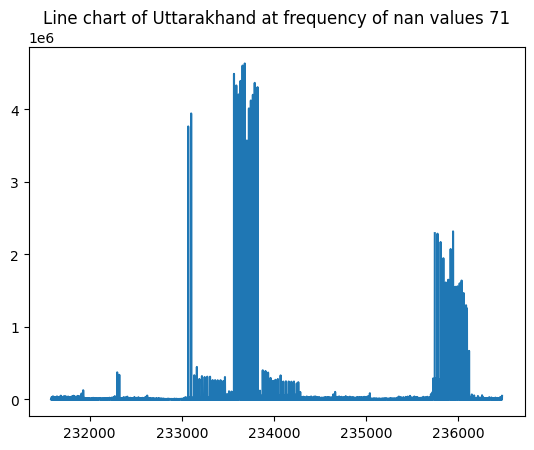

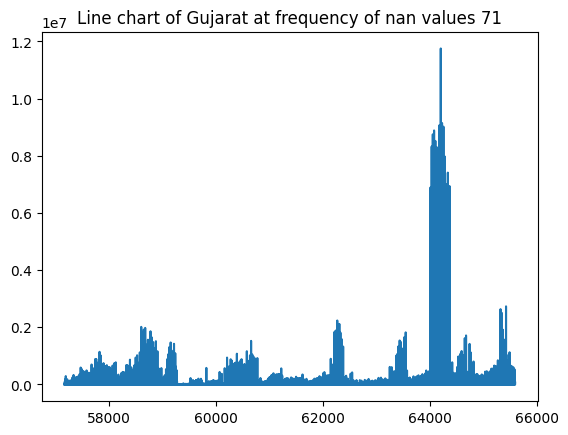

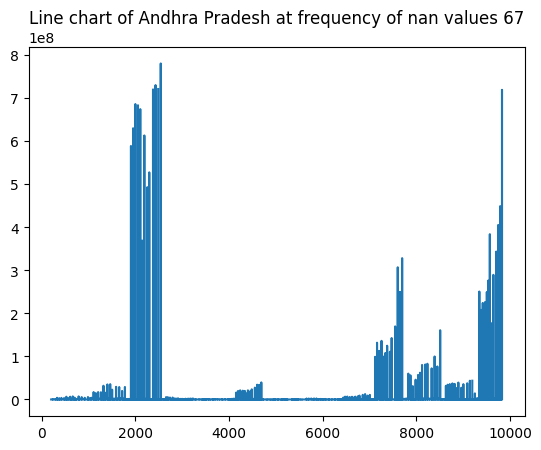

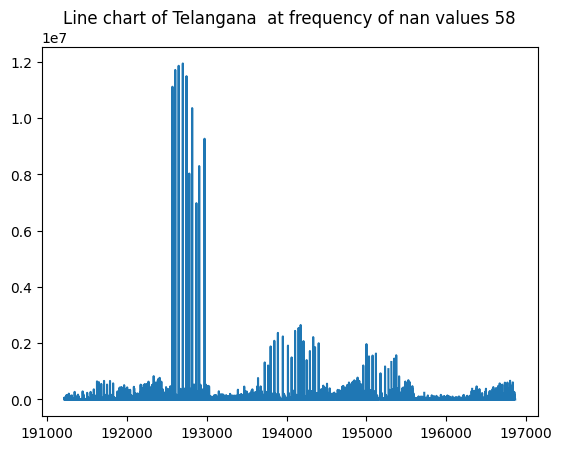

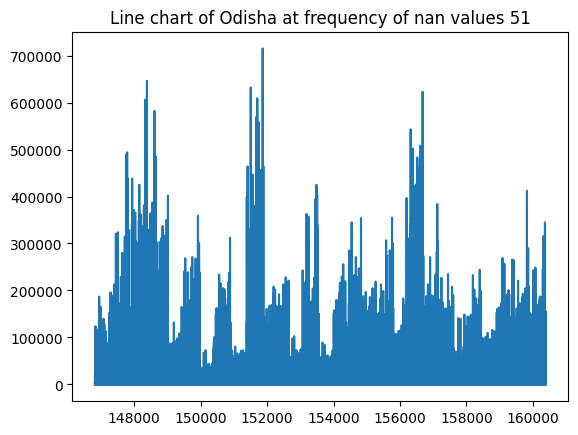

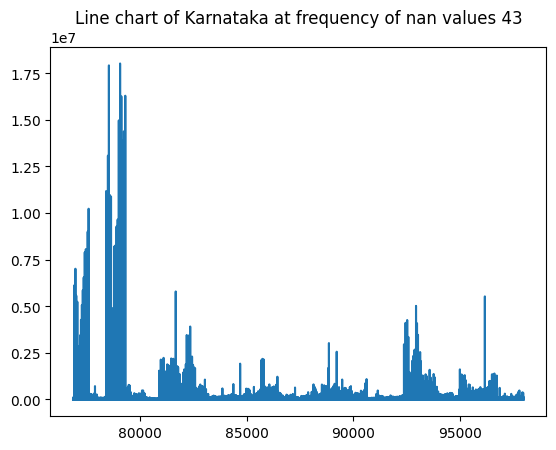

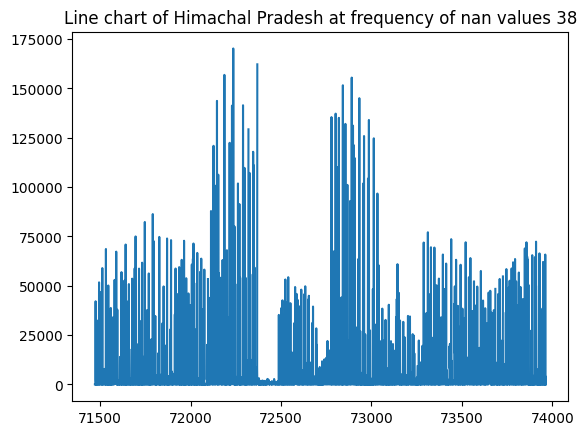

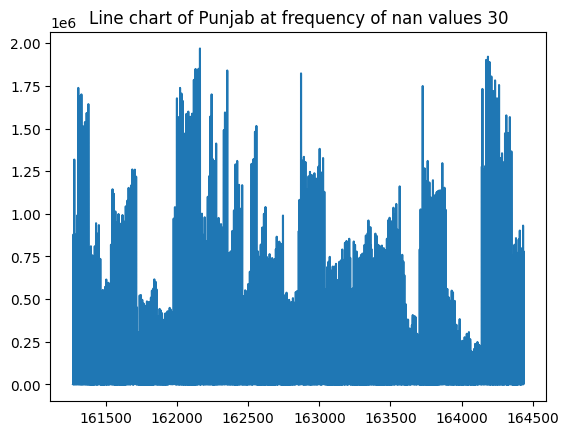

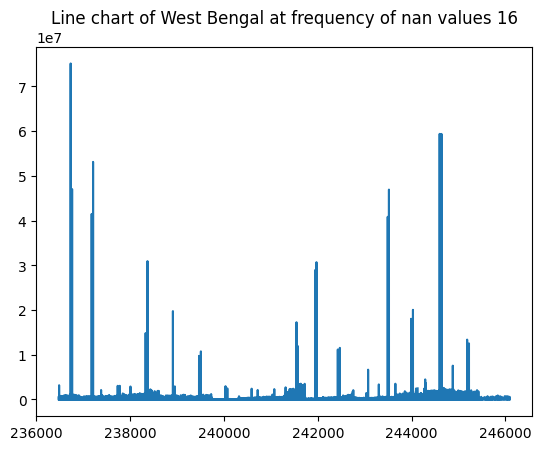

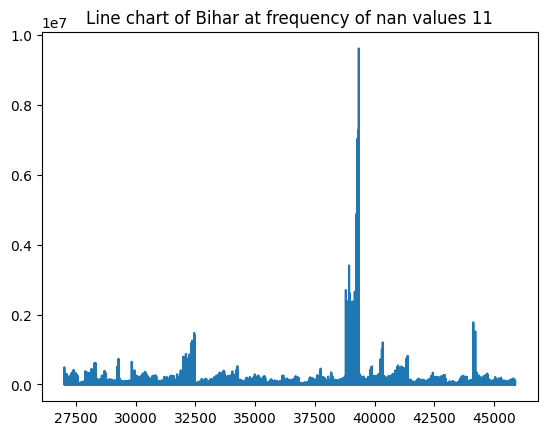

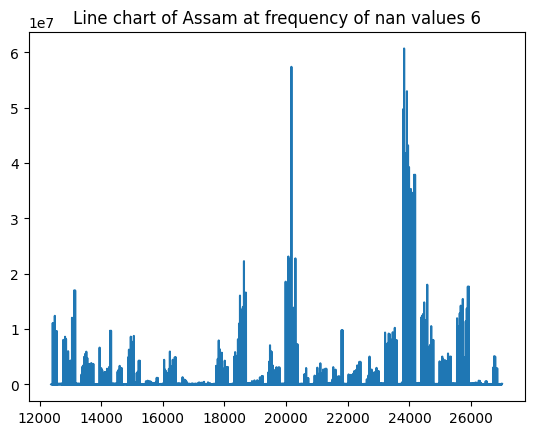

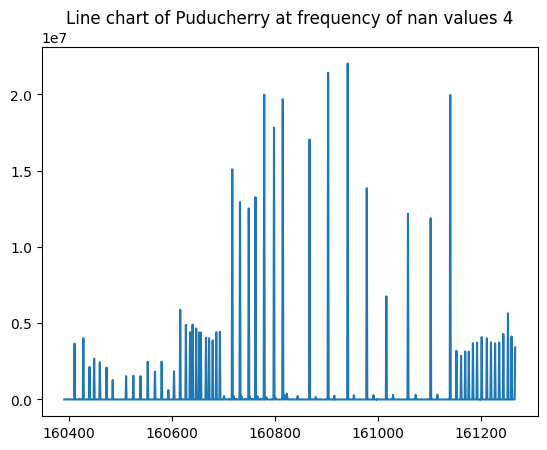

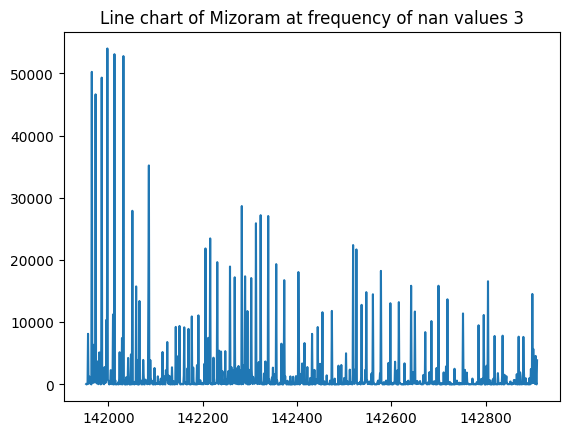

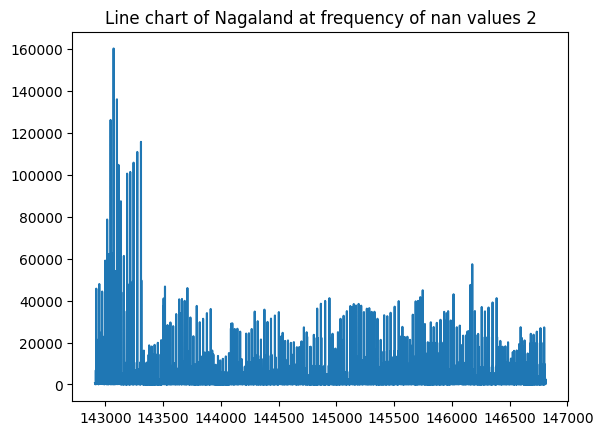

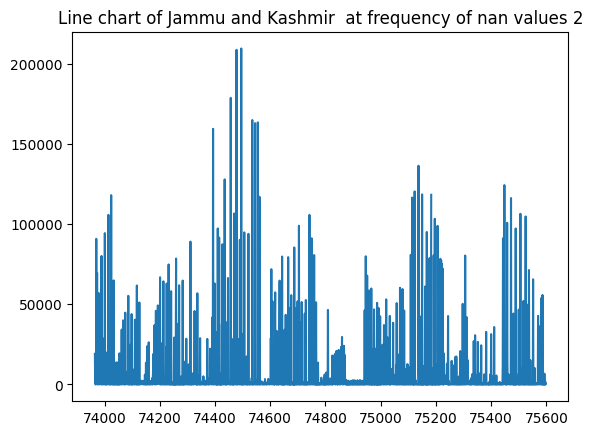

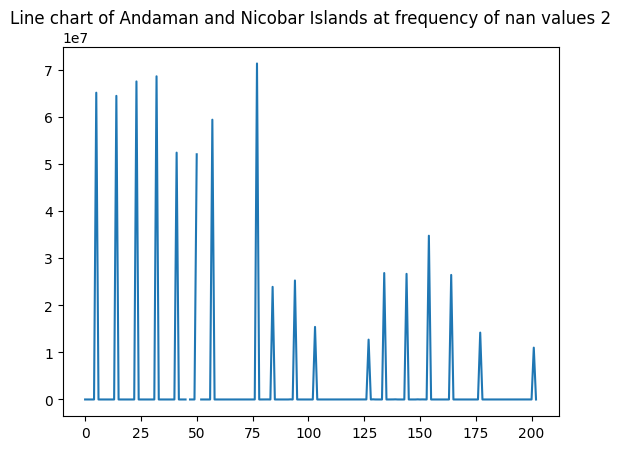

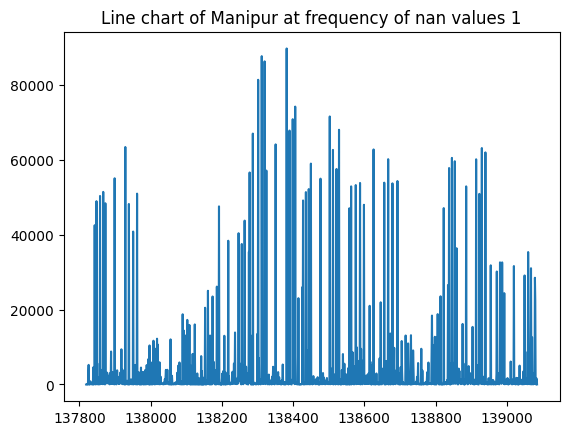

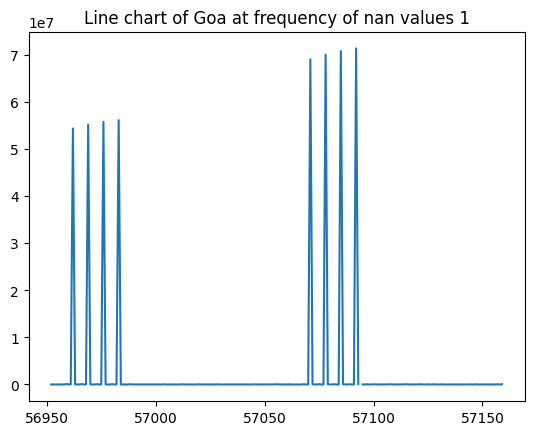

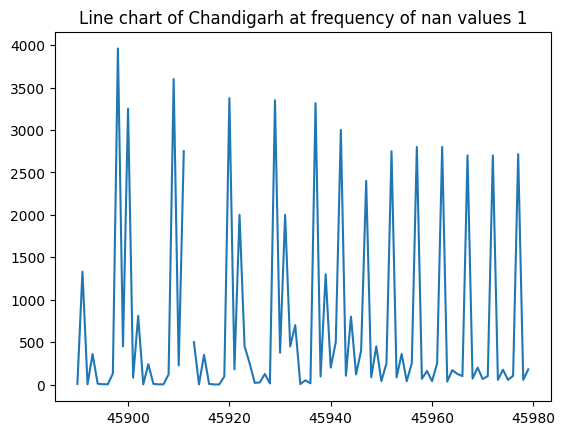

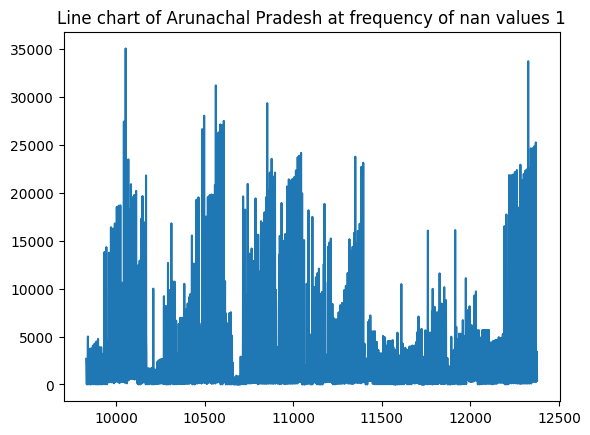

In [66]:
for i in df[df.Production.isna()]['State_Name'].value_counts().index:
    
    ax=df[df['State_Name']==i]['Production'].plot(kind='line')
    plt.title(f"Line chart of {i} at frequency of nan values {df[df.Production.isna()]['State_Name'].value_counts()[i]}")
    plt.show()

<Axes: >

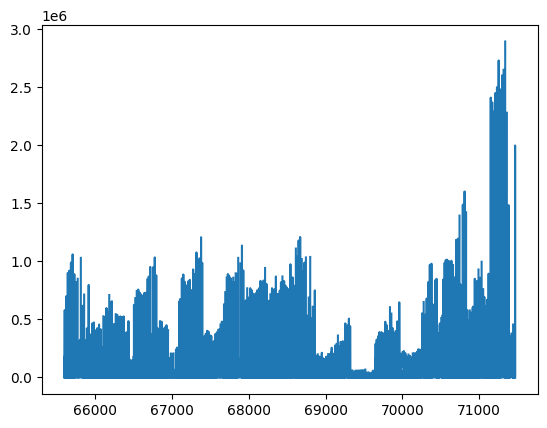

In [57]:
df[df['State_Name']=='Haryana']['Production'].plot(kind='line')

<Axes: >

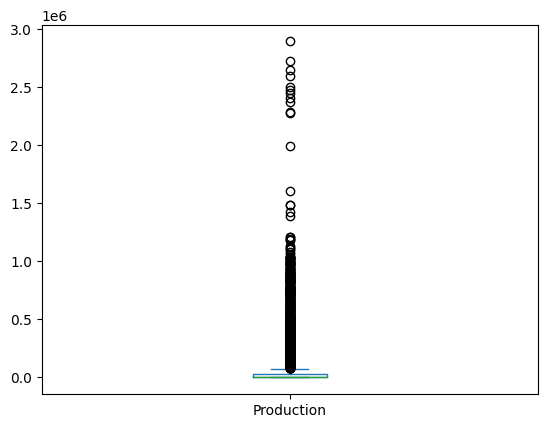

In [59]:
df[df['State_Name']=='Haryana']['Production'].plot(kind='box')

In [72]:
df[df.Production.isna()].groupby(['State_Name'])['State_Name'].count().sort_values(ascending=False)

State_Name
Haryana                        1335
Rajasthan                       448
Chhattisgarh                    341
Madhya Pradesh                  339
Tamil Nadu                      281
Kerala                          258
Maharashtra                     132
Uttar Pradesh                   117
Uttarakhand                      71
Gujarat                          71
Andhra Pradesh                   67
Telangana                        58
Odisha                           51
Karnataka                        43
Himachal Pradesh                 38
Punjab                           30
West Bengal                      16
Bihar                            11
Assam                             6
Puducherry                        4
Mizoram                           3
Nagaland                          2
Jammu and Kashmir                 2
Andaman and Nicobar Islands       2
Manipur                           1
Goa                               1
Chandigarh                        1
Arunachal Pradesh

In [74]:
df[df.Production.isna()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00,NaN
244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00,NaN
245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00,NaN
245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00,NaN


In [4]:
min(df['Crop_Year'])

1997

In [5]:
df['Crop_Year']=df['Crop_Year'].astype('object')

In [8]:
df.groupby(['Crop_Year'])['Production'].mean()

Crop_Year
1997    9.565489e+04
1998    5.172545e+05
1999    5.172145e+05
2000    5.496723e+05
2001    5.616144e+05
2002    4.654666e+05
2003    4.619857e+05
2004    5.909555e+05
2005    5.949965e+05
2006    6.212016e+05
2007    4.821251e+05
2008    5.423063e+05
2009    5.564389e+05
2010    4.573050e+05
2011    1.037554e+06
2012    6.197705e+05
2013    9.575947e+05
2014    8.011596e+05
2015    1.236197e+04
Name: Production, dtype: float64

In [17]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [18]:
df.groupby(['Crop_Year'])['Production'].mean()

Crop_Year
1997     95654.8945
1998    517254.5410
1999    517214.5314
2000    549672.3328
2001    561614.4467
2002    465466.5676
2003    461985.7346
2004    590955.5271
2005    594996.4738
2006    621201.5687
2007    482125.0500
2008    542306.2827
2009    556438.8774
2010    457305.0479
2011   1037553.7733
2012    619770.5360
2013    957594.7037
2014    801159.5590
2015     12361.9692
Name: Production, dtype: float64

In [20]:
df[df.Production.isna()]['Crop_Year'].value_counts()

Crop_Year
2006    352
2009    349
2008    320
2005    280
2011    280
2010    272
1998    271
2004    259
2007    257
2012    226
2013    175
2014    158
2003    148
2002    135
2000    105
1999     74
2001     68
2015      1
Name: count, dtype: int64

In [23]:
sum([352, 349, 320, 280, 280, 272, 271, 259, 257, 226, 175, 158, 148, 135, 105, 74, 68, 1])

3730

In [73]:
NAn_Bhai=df[df.Production.isna()][['Crop','Season']].value_counts().reset_index()
NAn_Bhai.head()

,Crop,Season,count
0,Sesamum,Kharif,188
1,Sannhamp,Whole Year,163
2,Maize,Kharif,150
3,Moong(Green Gram),Kharif,138
4,Cotton(lint),Kharif,130


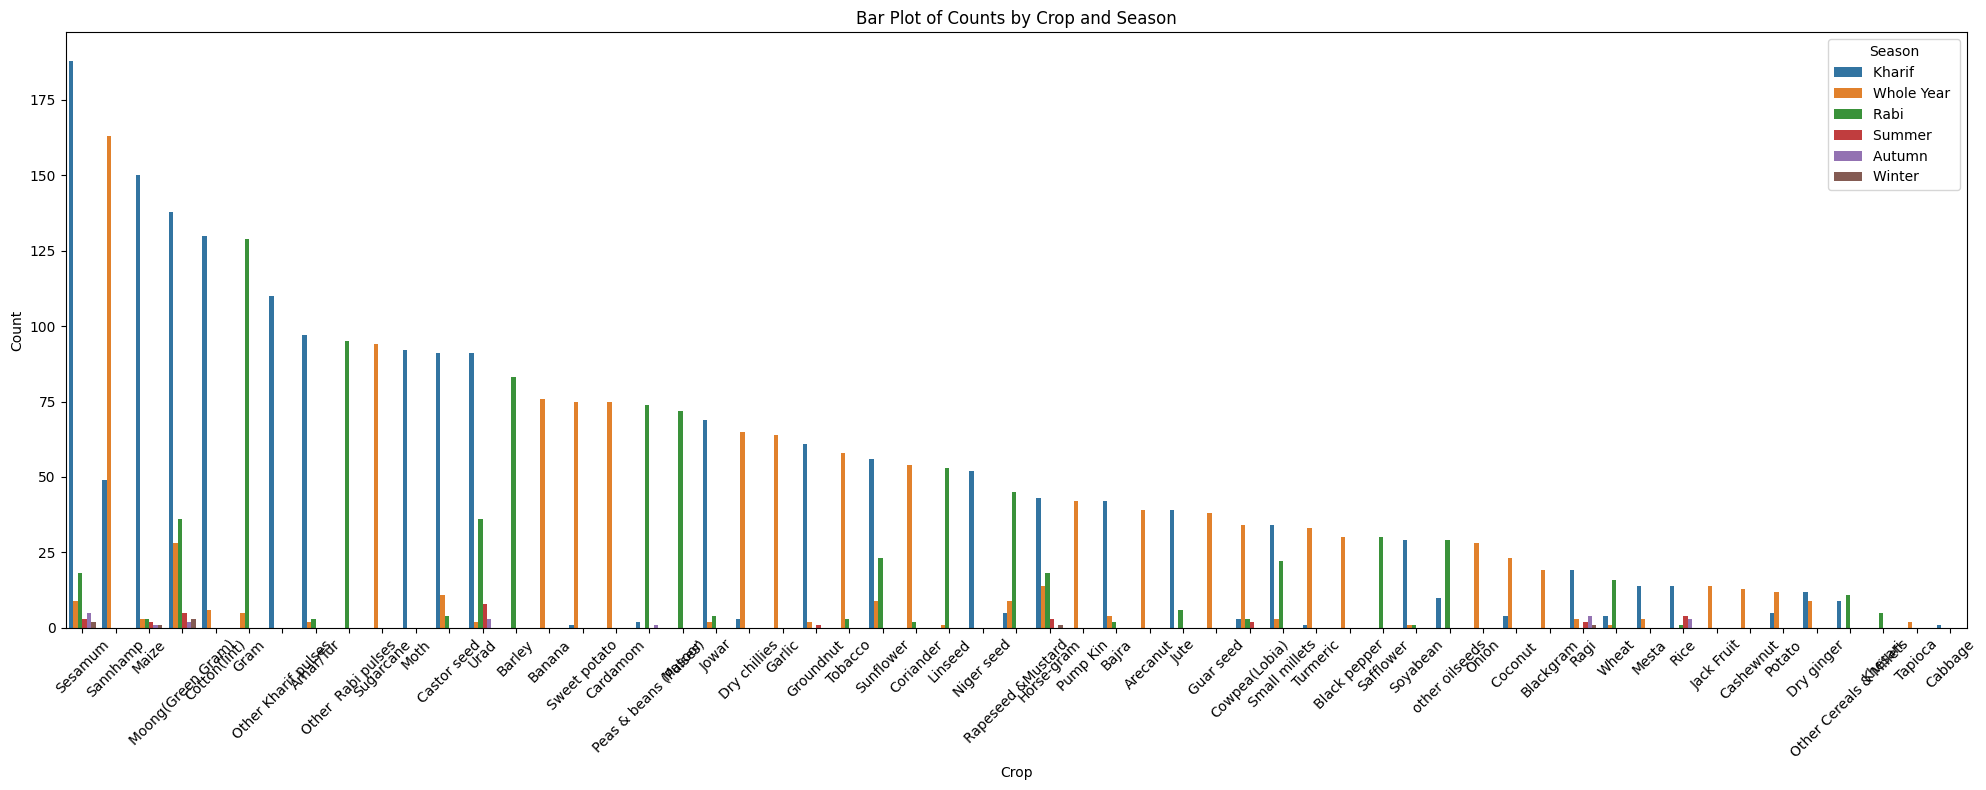

In [79]:
plt.figure(figsize=(20,8))
sns.barplot(x='Crop', y='count', hue='Season', data=NAn_Bhai)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Crop')
plt.ylabel('Count')
plt.title('Bar Plot of Counts by Crop and Season')
plt.legend(title='Season', loc='upper right')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [42]:
df[['Crop_Year','Crop','Production']].groupby(['Crop','Crop_Year']).agg({'Crop_Year':'count', 'Production':'mean'}).sort_values(by=['Production'],ascending=False)


Crop_Year     Production
Crop       Crop_Year                          
Coconut    2014              69 126059555.4531
           2011             130 109630789.6935
           2013             126 100157278.5000
           2012              92  86142931.9655
           2010              78  71746158.4615
...                         ...            ...
Apple      2002               2         0.0000
Jack Fruit 2012              14            NaN
Pump Kin   2012              14            NaN
           2013              14            NaN
           2014              14            NaN

[1187 rows x 2 columns]

In [6]:
df[['Crop','Production']].groupby(['Crop'])['Production'].mean().sort_values(ascending=False)

Crop
Coconut            6.638490e+07
Sugarcane          7.072546e+05
Total foodgrain    2.301636e+05
Wheat              1.691833e+05
Jute               1.289476e+05
                       ...     
Pump Kin           0.000000e+00
Ribed Guard        0.000000e+00
Beet Root          0.000000e+00
Snak Guard         0.000000e+00
Apple              0.000000e+00
Name: Production, Length: 124, dtype: float64

In [11]:
df[['Crop','Crop_Year','Production']]

,Crop,Crop_Year,Production
0,Arecanut,2000,2000.0
1,Other Kharif pulses,2000,1.0
2,Rice,2000,321.0
3,Banana,2000,641.0
4,Cashewnut,2000,165.0
...,...,...,...
246086,Rice,2014,801.0
246087,Sesamum,2014,463.0
246088,Sugarcane,2014,16250.0
246089,Rice,2014,597899.0


In [40]:
df[df.Production.isna()][['Crop']].value_counts().sort_values(ascending=False).reset_index()

,Crop,count
0,Sesamum,225
1,Moong(Green Gram),212
2,Sannhamp,212
3,Maize,160
4,Urad,140
5,Cotton(lint),136
6,Gram,134
7,Other Kharif pulses,110
8,Castor seed,106
9,Arhar/Tur,102


In [97]:
df.head(2)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0


In [98]:
df[df.Production.isna()][['Crop','Season','Crop_Year','District_Name']].value_counts().sort_values(ascending=False).reset_index()

,Crop,Season,Crop_Year,District_Name,count
0,Arecanut,Whole Year,1998,BANKURA,1
1,Arecanut,Whole Year,2002,THENI,1
2,Arhar/Tur,Kharif,2002,BHILWARA,1
3,Arecanut,Whole Year,2003,THANJAVUR,1
4,Arecanut,Whole Year,2002,DHARMAPURI,1
...,...,...,...,...,...
3725,other oilseeds,Rabi,2003,SRIKAKULAM,1
3726,other oilseeds,Rabi,2003,VISAKHAPATANAM,1
3727,other oilseeds,Rabi,2003,VIZIANAGARAM,1
3728,other oilseeds,Rabi,2003,WARANGAL,1


In [87]:
df['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [128]:
is_not_null = pd.notnull(df['Production'].iloc[0])

print(is_not_null)


True


In [232]:
k=[]
for i in range(df.shape[0]):
    if pd.notnull(df['Production'].iloc[i]):
        k.append(df['Production'].iloc[i])
    else:
        if df.Crop_Year[i]>=2015:
            k.append(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i-1]) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])])
        else:
            if list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and  list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                #k.append(np.nan)
                if list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-2) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and  list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+2) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                    #k.append(np.nan)
                    if list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-3) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and  list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+3) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                        #k.append(np.nan)
                        if list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-4) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and  list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+4) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                            k.append(np.nan)
                        elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-4) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+4) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                            a2=0
                            a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-4) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                            a3=(a1+a2)/2
                            k.append(a3) 
                        elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-4) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+4) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                            a2=0
                            a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-4) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                            a3=(a1+a2)/2
                            k.append(a3)
                        elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-4) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+4) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[]:
                            a1=0
                            a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+4) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                            a3=(a1+a2)/2
                            k.append(a3)
                        else:
                            a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+4) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                            a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+4) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                            a3=(a1+a2)/2
                            k.append(a3)
                    elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-3) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+3) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                        a2=0
                        a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-3) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                        a3=(a1+a2)/2
                        k.append(a3) 
                    elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-3) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+3) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                        a2=0
                        a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-3) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                        a3=(a1+a2)/2
                        k.append(a3)
                    elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-3) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+3) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[]:
                        a1=0
                        a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+3) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                        a3=(a1+a2)/2
                        k.append(a3)
                    else:
                        a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+3) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                        a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+3) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                        a3=(a1+a2)/2
                        k.append(a3)
                elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-2) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+2) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                    a2=0
                    a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-2) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                    a3=(a1+a2)/2
                    k.append(a3)
                elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-2) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+2) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[]:
                    a1=0
                    a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+2) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                    a3=(a1+a2)/2
                    k.append(a3)
                else:
                    a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+2) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                    a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+2) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                    a3=(a1+a2)/2
                    k.append(a3)
                
            elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                a2=0
                a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                
                a3=(a1+a2)/2
                k.append(a3)
            elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[]:
                a1=0
                a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                a3=(a1+a2)/2
                k.append(a3)
            else:
                a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                a3=(a1+a2)/2
                k.append(a3)

In [8]:
k=[]
j=0
for i in range(df.shape[0]):
    if pd.notnull(df['Production'].iloc[i]):
        k.append(df['Production'].iloc[i])
    else:
        if df.Crop_Year[i]>=2015:
            k.append(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i-1]) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])])
        else:
            if list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and  list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                #k.append(np.nan)
                while True:
                    for i in range (df.shape[0]):
                        if list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and  list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                            k.append(np.nan)
                        elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                            a2=0
                            a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                            a3=(a1+a2)/2
                            k.append(a3)
                        elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[]:
                            a1=0
                            a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                            a3=(a1+a2)/2
                            k.append(a3)
                        else:
                            a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                            a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                            a3=(a1+a2)/2
                            k.append(a3)
                    j+=1
                    if (pd.Series(k).isna().sum()==0):
                        break
                    
                
            elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                a2=0
                a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                
                a3=(a1+a2)/2
                k.append(a3)
            elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[]:
                a1=0
                a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                a3=(a1+a2)/2
                k.append(a3)
            else:
                a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                a3=(a1+a2)/2
                k.append(a3)

KeyboardInterrupt: 

In [21]:
i=50
df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])][]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
50,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Coconut,13876.57,52030000.0


In [39]:
df[(df.Crop=='Coconut ') & (df.Season=='Whole Year ') & (df.District_Name=='NICOBARS')]['Production'].()

TypeError: new_method() missing 1 required positional argument: 'other'

In [86]:
l=[]
for i in range(df.shape[0]):
    if pd.notnull(k[i]):
        l.append(k[i])
    else:
        temp=df[(df.Crop == df.Crop[i]) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].mean()
        l.append(temp)
        if pd.notnull(temp):
            pass
        else:
            print(df[(df.Crop == df.Crop[i]) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])
        #l.append(temp)
            l.append(np.random.choice(list(df[(df['Crop']==df.Crop[i]) & (df['Season']==df.Season[i])]['Area'])))

698   NaN
Name: Production, dtype: float64
2489   NaN
Name: Production, dtype: float64
3180   NaN
Name: Production, dtype: float64
3499   NaN
Name: Production, dtype: float64
4971   NaN
Name: Production, dtype: float64
5457   NaN
Name: Production, dtype: float64
6266   NaN
Name: Production, dtype: float64
7116   NaN
Name: Production, dtype: float64
7901   NaN
Name: Production, dtype: float64
9196   NaN
Name: Production, dtype: float64
9215   NaN
Name: Production, dtype: float64
9628   NaN
Name: Production, dtype: float64
9793   NaN
Name: Production, dtype: float64
43039   NaN
Name: Production, dtype: float64
46270   NaN
Name: Production, dtype: float64
46745   NaN
Name: Production, dtype: float64
46812   NaN
Name: Production, dtype: float64
46887   NaN
46927   NaN
46962   NaN
46999   NaN
Name: Production, dtype: float64
46887   NaN
46927   NaN
46962   NaN
46999   NaN
Name: Production, dtype: float64
46887   NaN
46927   NaN
46962   NaN
46999   NaN
Name: Production, dtype: float64
46887 

In [89]:
pd.Series(l).isna().sum()

588

In [87]:
df[pd.Series(l).isna()]

C:\Users\new\AppData\Local\Temp\ipykernel_20924\1676933023.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[pd.Series(l).isna()]


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.0,NaN
2490,Andhra Pradesh,EAST GODAVARI,2013,Whole Year,Sweet potato,34.0,298.0
3182,Andhra Pradesh,GUNTUR,2014,Kharif,Bajra,689.0,758.0
3502,Andhra Pradesh,KADAPA,2003,Rabi,Sesamum,3772.0,668.0
4975,Andhra Pradesh,KURNOOL,2003,Rabi,Sesamum,78.0,14.0
...,...,...,...,...,...,...,...
232332,Uttarakhand,CHAMOLI,2002,Kharif,Small millets,5602.0,4600.0
233416,Uttarakhand,DEHRADUN,2012,Summer,Maize,2.0,2.0
234150,Uttarakhand,NAINITAL,2010,Rabi,Other Rabi pulses,1.0,1.0
234175,Uttarakhand,NAINITAL,2011,Kharif,Sunflower,6.0,2.0


In [85]:
np.random.choice(list(df[(df['Crop']=='Sannhamp') & (df['Season']=='Rabi       ')]['Area']))

10.0

<Axes: xlabel='[Area]', ylabel='[Production]'>

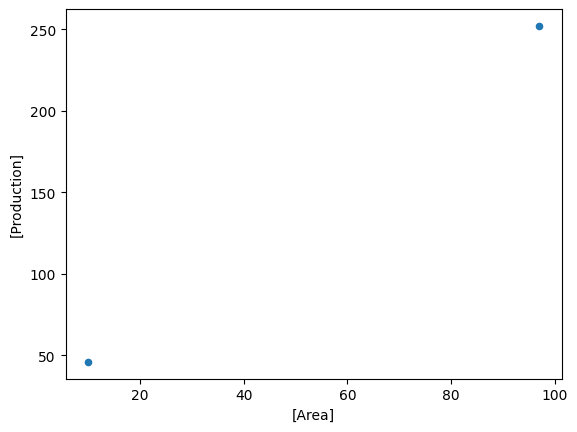

In [68]:
df[(df['Crop']=='Sannhamp') & (df['Season']=='Rabi       ')][['Area','Production']].plot(kind='scatter',x=['Area'],y=['Production'])

In [56]:
df['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [53]:
d.uf[697:700]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
697,Andhra Pradesh,ANANTAPUR,2009,Rabi,Ragi,1122.0,2458.0
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.0,NaN
699,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rice,19428.0,46899.0


In [47]:
df[pd.Series(k).isna()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.0,NaN
2489,Andhra Pradesh,EAST GODAVARI,2013,Whole Year,Sannhamp,175.0,NaN
3180,Andhra Pradesh,GUNTUR,2013,Whole Year,Sannhamp,2594.0,NaN
3499,Andhra Pradesh,KADAPA,2003,Rabi,other oilseeds,4.0,NaN
4971,Andhra Pradesh,KURNOOL,2003,Rabi,other oilseeds,13.0,NaN
...,...,...,...,...,...,...,...
231749,Uttarakhand,ALMORA,2007,Rabi,Other Rabi pulses,1.0,NaN
232832,Uttarakhand,CHAMPAWAT,2007,Summer,Moong(Green Gram),1.0,NaN
233565,Uttarakhand,HARIDWAR,2002,Whole Year,Garlic,3.0,NaN
233589,Uttarakhand,HARIDWAR,2003,Whole Year,Garlic,1.0,NaN


In [45]:
df[pd.Series(k).isna()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.0,NaN
2489,Andhra Pradesh,EAST GODAVARI,2013,Whole Year,Sannhamp,175.0,NaN
3180,Andhra Pradesh,GUNTUR,2013,Whole Year,Sannhamp,2594.0,NaN
3499,Andhra Pradesh,KADAPA,2003,Rabi,other oilseeds,4.0,NaN
4971,Andhra Pradesh,KURNOOL,2003,Rabi,other oilseeds,13.0,NaN
...,...,...,...,...,...,...,...
231749,Uttarakhand,ALMORA,2007,Rabi,Other Rabi pulses,1.0,NaN
232832,Uttarakhand,CHAMPAWAT,2007,Summer,Moong(Green Gram),1.0,NaN
233565,Uttarakhand,HARIDWAR,2002,Whole Year,Garlic,3.0,NaN
233589,Uttarakhand,HARIDWAR,2003,Whole Year,Garlic,1.0,NaN


In [ ]:
df

In [36]:
[i  for i in df.District_Name.unique() if i.startswith("Andaman")]

[]

In [17]:
df[df['Production'].isna()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00,NaN
244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00,NaN
245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00,NaN
245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00,NaN


In [18]:
df[['Crop','Season']]

,Crop,Season
0,Arecanut,Kharif
1,Other Kharif pulses,Kharif
2,Rice,Kharif
3,Banana,Whole Year
4,Cashewnut,Whole Year
...,...,...
246086,Rice,Summer
246087,Sesamum,Summer
246088,Sugarcane,Whole Year
246089,Rice,Winter


In [ ]:
k=[]
j=0
for i in range(df.shape[0]):
    if pd.notnull(df['Production'].iloc[i]):
        k.append(df['Production'].iloc[i])
    else:
        if df.Crop_Year[i]>=2015:
            k.append(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i-1]) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])])
        else:
            if list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and  list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                #k.append(np.nan)
                while True:
                    for i in range (df.shape[0]):
                        if list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and  list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                            k.append(np.nan)
                        elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                            a2=0
                            a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                            a3=(a1+a2)/2
                            k.append(a3)
                        elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[]:
                            a1=0
                            a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                            a3=(a1+a2)/2
                            k.append(a3)
                        else:
                            a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                            a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                            a3=(a1+a2)/2
                            k.append(a3)
                    j+=1
                    if (pd.Series(k).isna().sum()==0):
                        break
                    
                
            elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
                a2=0
                a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                
                a3=(a1+a2)/2
                k.append(a3)
            elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[]:
                a1=0
                a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                a3=(a1+a2)/2
                k.append(a3)
            else:
                a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
                a3=(a1+a2)/2
                k.append(a3)

In [7]:
k=[]
j=0
while True:
    for i in range (df.shape[0]):
        if list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and  list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
            k.append(np.nan)
        elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]:
            a2=0
            a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
            a3=(a1+a2)/2
            k.append(a3)
        elif list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[]:
            a1=0
            a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
            a3=(a1+a2)/2
            k.append(a3)
        else:
            a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
            a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+j) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
            a3=(a1+a2)/2
            k.append(a3)
    j+=1
    if (pd.Series(k).isna().sum()==0):
        break

KeyboardInterrupt: 

In [ ]:
while True:
    # Body of the loop
    print("This will run at least once")

    # Update condition
    condition = input("Do you want to continue? (yes/no): ").strip().lower() == 'yes'

    # Break the loop if condition is False
    if not condition:
        break

In [5]:
k

[]

In [233]:
df['Production'].isna().sum()

3730

In [234]:
pd.Series(k).isna().sum()

2046

246091

In [218]:
i=1317
list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[]
list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[]
list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])==[] and list(df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'])!=[]



[]

True

In [179]:
df.Crop_Year[8]

2000

In [195]:
df[(df.State_Name==df.State_Name[8]) & (df.Crop=='Sweet potato') & (df['Crop_Year']==df['Crop_Year'][8])]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0
88,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2000,Whole Year,Sweet potato,78.0,843.0


In [192]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [187]:
i=8
df[(df.Crop == df.Crop[i])& (df.Crop_Year == df.Crop_Year[i]-1)& (df.Season == df.Season[i])& (df.State_Name == df.State_Name[i])]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
12805,Assam,BARPETA,1999,Whole Year,Sweet potato,650.0,1625.0
13396,Assam,BONGAIGAON,1999,Whole Year,Sweet potato,373.0,1119.0
13981,Assam,CACHAR,1999,Whole Year,Sweet potato,155.0,814.0
14906,Assam,DARRANG,1999,Whole Year,Sweet potato,500.0,1251.0
15485,Assam,DHEMAJI,1999,Whole Year,Sweet potato,166.0,554.0
...,...,...,...,...,...,...,...
187636,Tamil Nadu,TIRUCHIRAPPALLI,1999,Whole Year,Sweet potato,47.0,570.0
188150,Tamil Nadu,TIRUNELVELI,1999,Whole Year,Sweet potato,2.0,24.0
188816,Tamil Nadu,TIRUVANNAMALAI,1999,Whole Year,Sweet potato,14.0,170.0
189314,Tamil Nadu,TUTICORIN,1999,Whole Year,Sweet potato,44.0,533.0


In [169]:
i=8
a1=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]-1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]
a2=df[(df.Crop == df.Crop[i]) & (df.Crop_Year == df.Crop_Year[i]+1) & (df.Season == df.Season[i]) & (df.District_Name == df.District_Name[i])]['Production'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [152]:
a1

Series([], Name: Production, dtype: float64)

In [139]:
min(df.Crop_Year)

1997

In [135]:
df.Production[0]

2000.0

In [114]:
df[(df.Crop == 'Arecanut') & (df.Crop_Year == 2001) & (df.Season == 'Whole Year ') & (df.District_Name == 'BANKURA')]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
237543,West Bengal,BANKURA,2001,Whole Year,Arecanut,4.0,8.0


In [96]:
df[(df.Crop == 'Maize') & (df.Crop_Year == 2005) & (df.Season == 'Kharif     ')]['Production'].mean()

27429.672371638142

In [61]:
df[(df.Crop == "Maize")][['Season','Crop_Year']].value_counts()

Season       Crop_Year
Kharif       2003         497
             2000         481
             1999         457
             2002         450
             2005         450
                         ... 
Winter       2009          12
             2014          12
             2013          10
Whole Year   2012           9
Kharif       2015           4
Name: count, Length: 95, dtype: int64

In [57]:
df.query('(Crop == "Sesamum") and (Season == "Kharif")')

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [17]:
df['Season'].value_counts()

Season
Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: count, dtype: int64

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
